In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn

from typing import Tuple
from typing import List
from copy import deepcopy, copy

from torch import nn
from torch.optim import SGD
from torch.nn.functional import cross_entropy

# Read data and create data loader:

In [2]:
def split_data(data_x: np.ndarray, data_y: np.ndarray):
    
    ordering = np.arange(data_x.shape[0])
    np.random.shuffle(ordering)
    data_x = data_x[ordering]
    data_y = data_y[ordering]
    
    valid_start = int(len(data_x) * 0.7)
    test_start = int(len(data_x) * 0.9)
    
    train_set = (data_x[:valid_start], data_y[:valid_start])
    valid_set = (data_x[valid_start:test_start], data_y[valid_start:test_start])
    test_set = (data_x[test_start:], data_y[test_start:])
    
    return train_set, valid_set, test_set

In [3]:
data = pd.read_csv('data_normalized.csv')

y = np.array(data['target'])
x = np.array(data.drop(['target'], axis=1))

train_set, valid_set, test_set = split_data(x,y)

x_train = torch.from_numpy(train_set[0]).float()
y_train = torch.from_numpy(train_set[1]).long()

x_val =  torch.from_numpy(valid_set[0]).float()
y_val =  torch.from_numpy(valid_set[1]).long()

x_test =  torch.from_numpy(test_set[0]).float()
y_test =  torch.from_numpy(test_set[1]).long()

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)


torch.Size([2055, 136]) torch.Size([2055])
torch.Size([587, 136]) torch.Size([587])
torch.Size([294, 136]) torch.Size([294])


In [4]:
input_dim = x_test.shape[1]
output_dim = 3 ## number of classes

# Neural network model:

In [5]:
class TheModelClass(nn.Module):
    def __init__(self, input_dim, hidden_dim1,hidden_dim2, output_dim):
        super(TheModelClass, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):   ## softmax, tanh, relu, sigmoid
        x = torch.tanh(self.fc1(x))   
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
def train_my_network(x_train, y_train, x_test, y_test, epoch, lr, momentum, hidden_dim1, hidden_dim2):
    
    
    # initialize the model, loss function and optimizer
    model: TheModelClass = TheModelClass(input_dim, 40,40,output_dim)
    optimizer: torch.optim.Optimizer = SGD(model.parameters(), lr=lr, momentum=momentum)
    criterion = nn.CrossEntropyLoss()
    
    ## for visual 
    loss_tab = []
    test_accuracy_tab = []
    train_accuracy_tab = []
    
    ## training loop:
    for e in range(epoch):   
        ## shuffle training data
        ordering = np.arange(x_train.shape[0])
        np.random.shuffle(ordering)
        x_train = x_train[ordering]
        y_train = y_train[ordering]
        
        optimizer.zero_grad()
        output: torch.Tensor = model(x_train)  
        loss: torch.Tensor = criterion(output, y_train)            
        loss.backward()
        optimizer.step()
        loss_tab.append(loss.item())        
        
        with torch.no_grad():
            output: torch.Tensor = model(x_train)  
            pred_labels = torch.argmax(output, 1)
            correct = ( (pred_labels - y_train) ==0).sum()
            train_accuracy_tab.append( float(correct) / len(y_train))
            #print(f"epoch {e} \tTrain accuracy: ", train_accuracy_tab[-1])   
            
            output: torch.Tensor = model(x_test)  
            pred_labels = torch.argmax(output, 1)
            correct = ( (pred_labels - y_test) ==0).sum()
            test_accuracy_tab.append( float(correct) / len(y_test))
            #print(f"epoch {e} \tTest accuracy: ", test_accuracy_tab[-1])   
          
    ## Vizualisation
    fig, axs = plt.subplots(1, 2, figsize = (16, 5))
    axs[0].plot(loss_tab, color = 'indigo')
    axs[1].plot(train_accuracy_tab, color='pink')
    axs[1].plot(test_accuracy_tab, color='indigo')
    axs[0].set_xlabel('epoch')
    axs[0].set_ylabel('loss')
    axs[0].grid(True)
    axs[1].set_xlabel('epoch')
    axs[1].set_ylabel('accuracy')
    axs[1].grid(True)
    plt.show()
    
    print("accuracy on training set: {:}\t accuracy on testing set: {:}".format(train_accuracy_tab[-1], test_accuracy_tab[-1] ))
    return model

# Grid search:

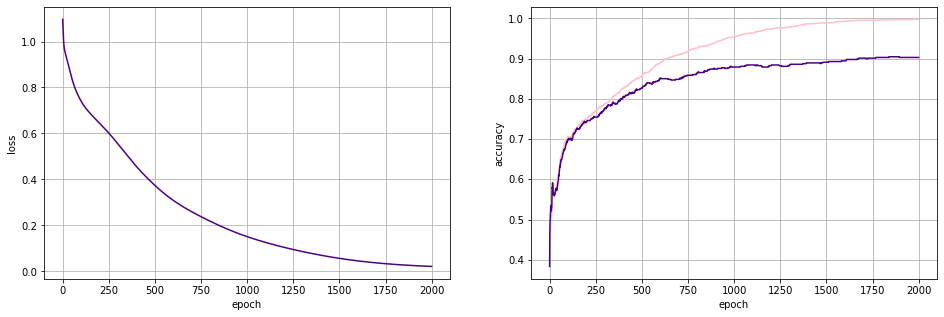

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9028960817717206
lr =  0.05 momentum =  0.7


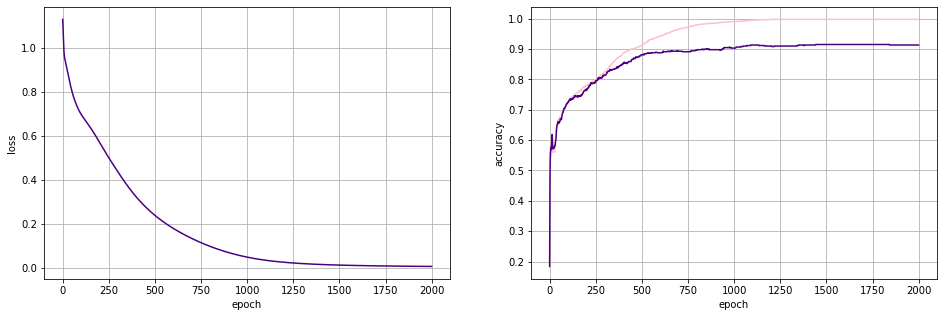

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9131175468483816
lr =  0.05 momentum =  0.8


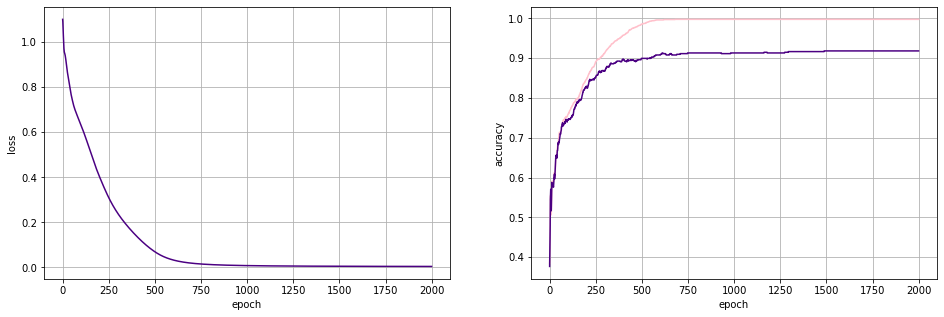

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9182282793867121
lr =  0.05 momentum =  0.9


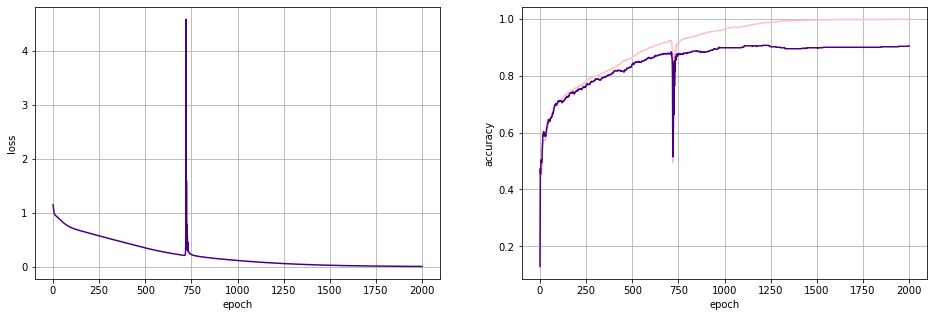

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9045996592844975
lr =  0.06 momentum =  0.7


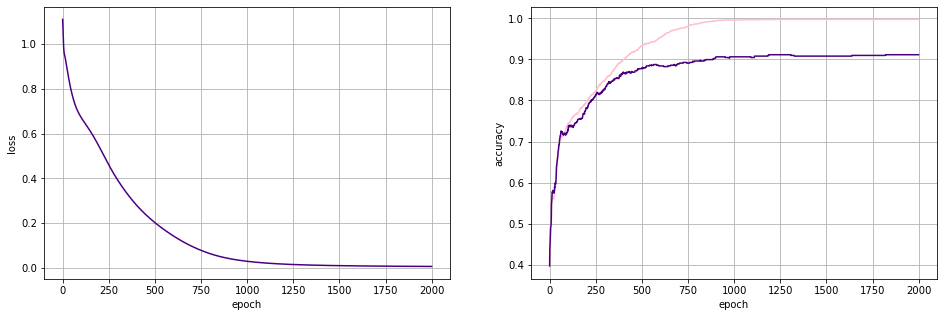

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9114139693356048
lr =  0.06 momentum =  0.8


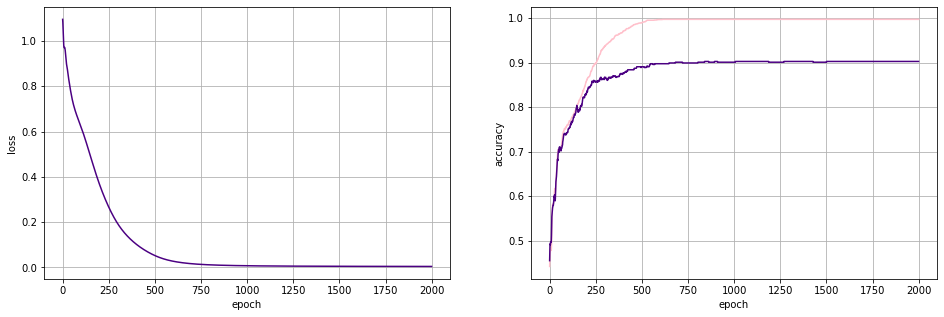

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9028960817717206
lr =  0.06 momentum =  0.9


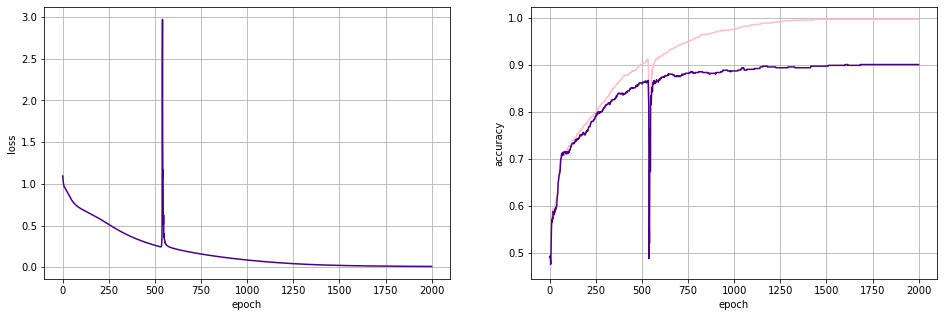

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9011925042589438
lr =  0.07 momentum =  0.7


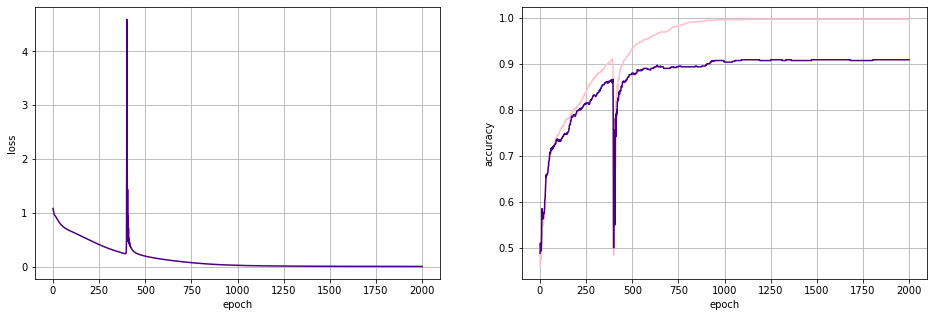

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.909710391822828
lr =  0.07 momentum =  0.8


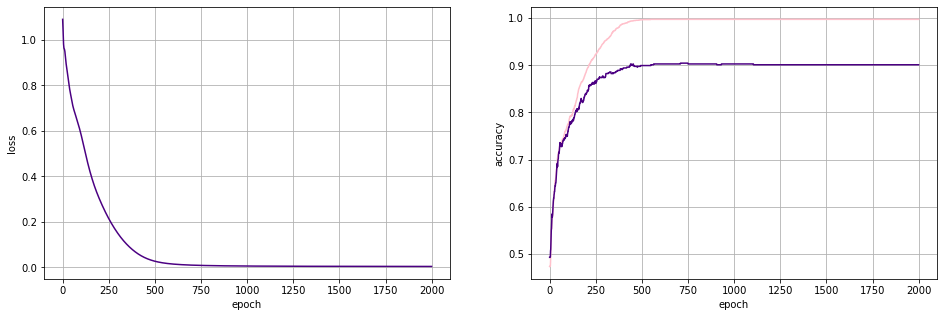

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9011925042589438
lr =  0.07 momentum =  0.9


In [7]:
epoch: int = 2000
hidden_dim1 = 30
hidden_dim2 = 30

lr_tab = [0.05, 0.06, 0.07]
momentum_tab = [0.7, 0.8, 0.9]

for lr in lr_tab:
    for momentum in momentum_tab:
        train_my_network(x_train, y_train, x_val, y_val, epoch, lr, momentum, hidden_dim1, hidden_dim2)
        print("lr = ", lr, "momentum = ", momentum )

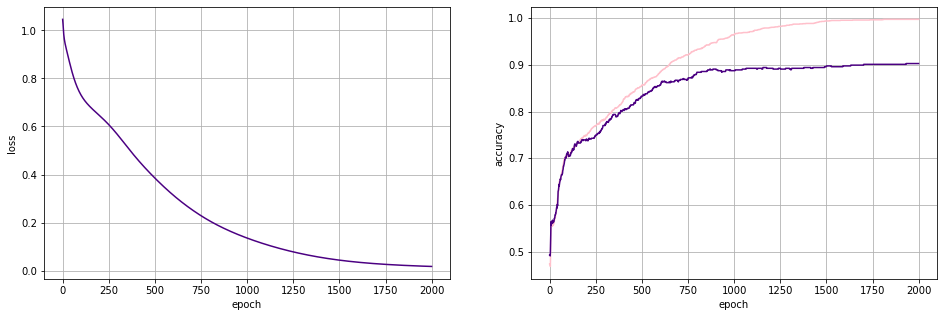

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9028960817717206
lr =  0.05 momentum =  0.7


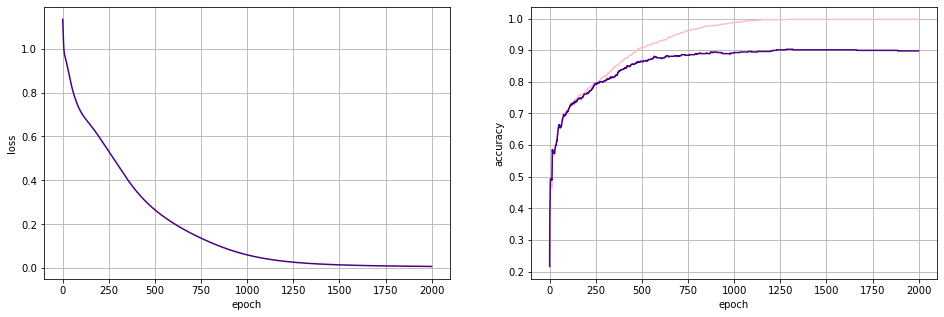

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.8977853492333902
lr =  0.05 momentum =  0.8


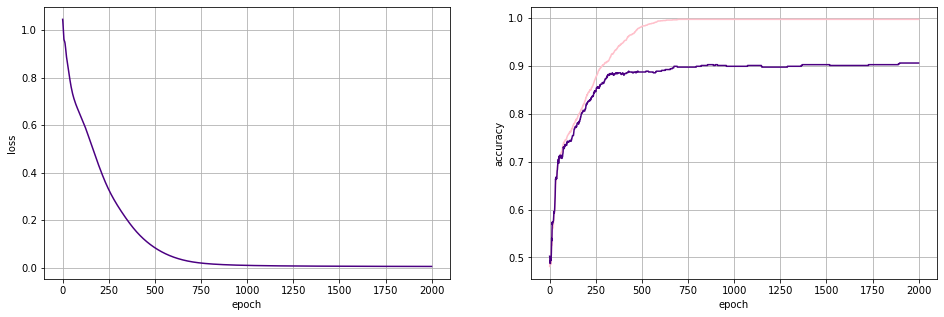

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9063032367972743
lr =  0.05 momentum =  0.9


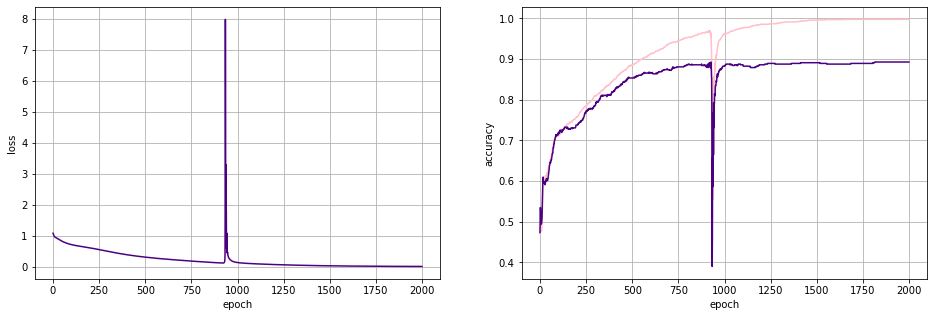

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.8926746166950597
lr =  0.06 momentum =  0.7


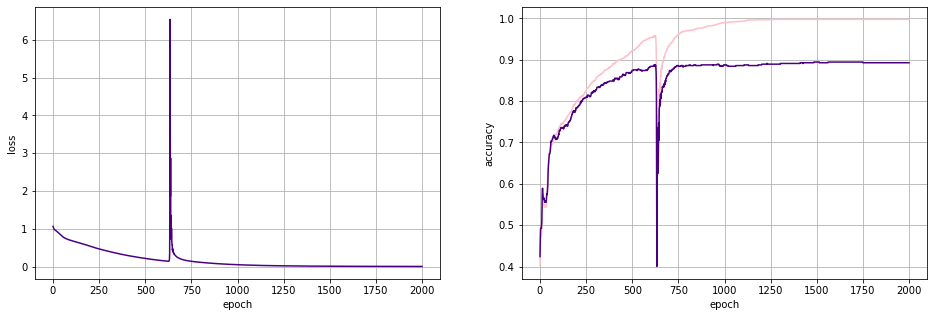

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.8926746166950597
lr =  0.06 momentum =  0.8


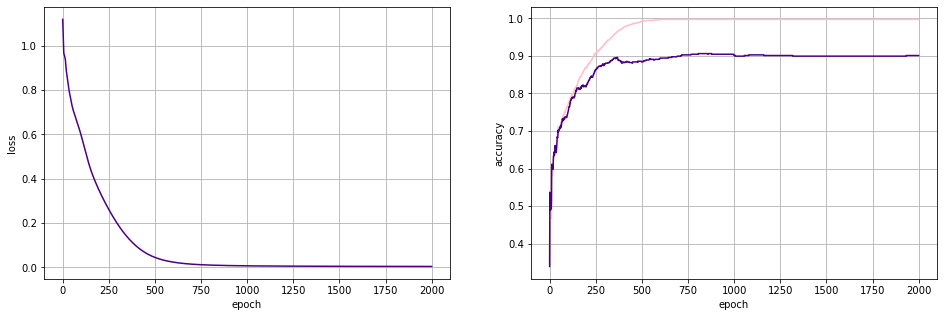

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9011925042589438
lr =  0.06 momentum =  0.9


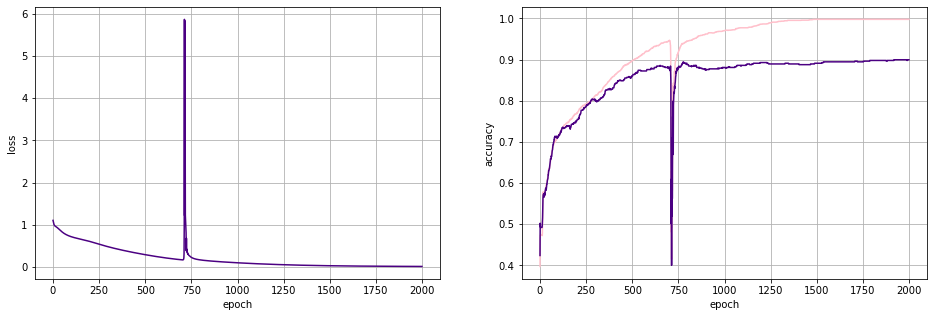

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.899488926746167
lr =  0.07 momentum =  0.7


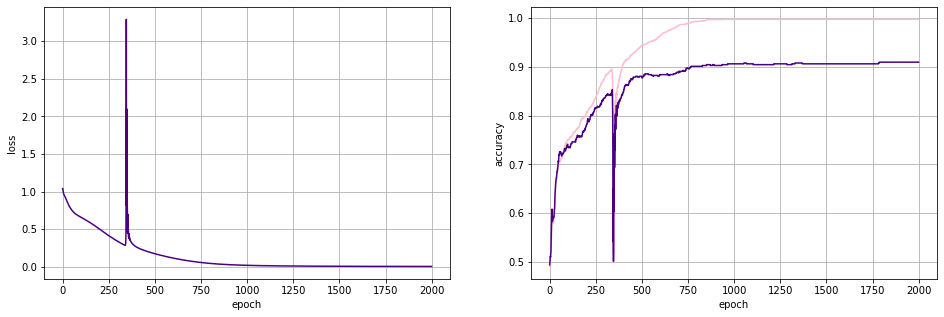

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.909710391822828
lr =  0.07 momentum =  0.8


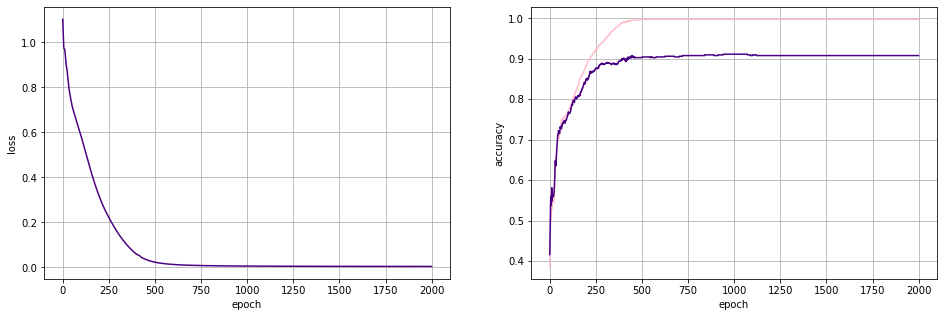

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9080068143100511
lr =  0.07 momentum =  0.9


In [8]:
epoch: int = 2000
hidden_dim1 = 40
hidden_dim2 = 40

lr_tab = [0.05, 0.06, 0.07]
momentum_tab = [0.7, 0.8, 0.9]

for lr in lr_tab:
    for momentum in momentum_tab:
        train_my_network(x_train, y_train, x_val, y_val, epoch, lr, momentum, hidden_dim1, hidden_dim2)
        print("lr = ", lr, "momentum = ", momentum )

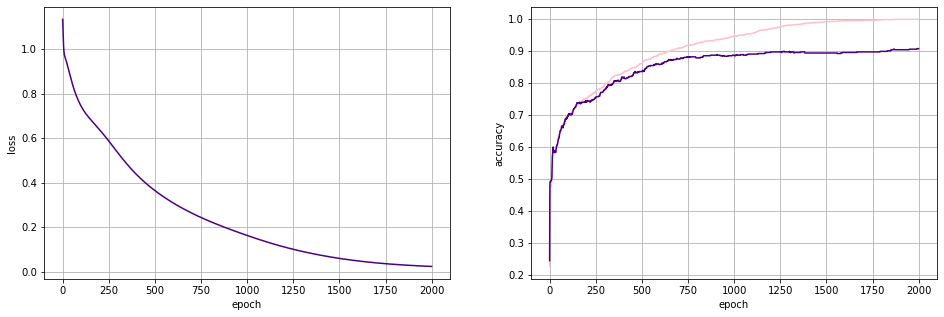

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9063032367972743
lr =  0.05 momentum =  0.7


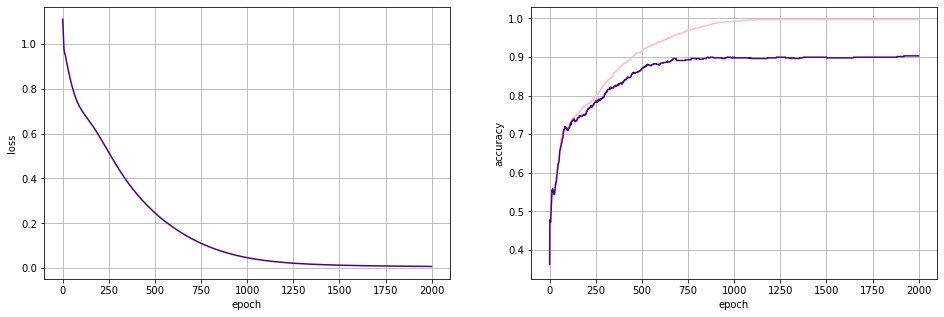

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9028960817717206
lr =  0.05 momentum =  0.8


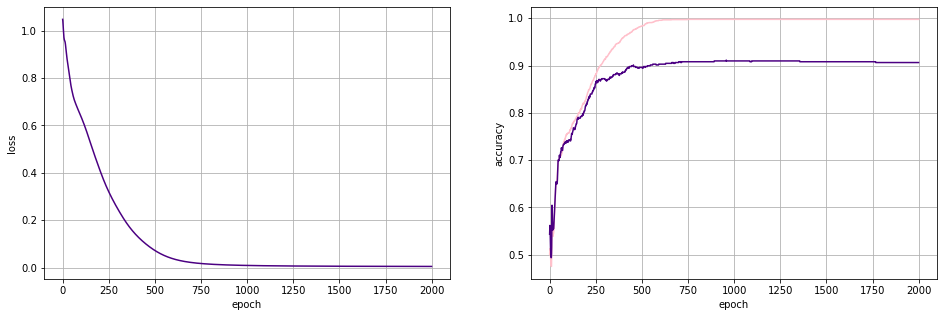

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9063032367972743
lr =  0.05 momentum =  0.9


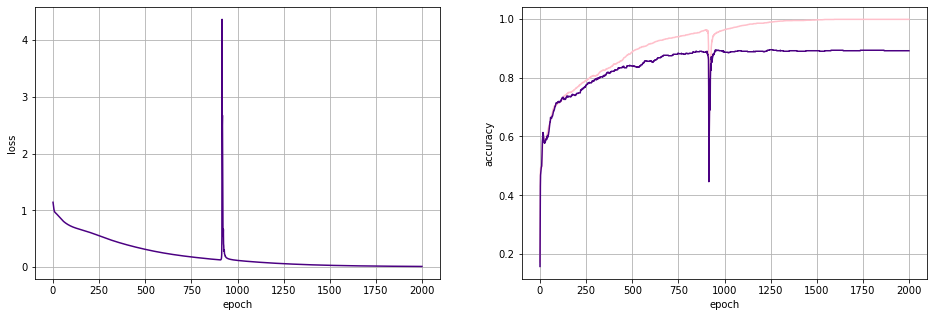

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.8909710391822828
lr =  0.06 momentum =  0.7


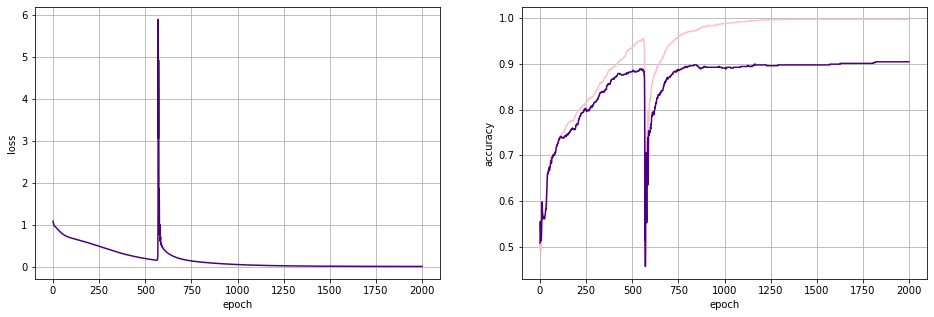

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9045996592844975
lr =  0.06 momentum =  0.8


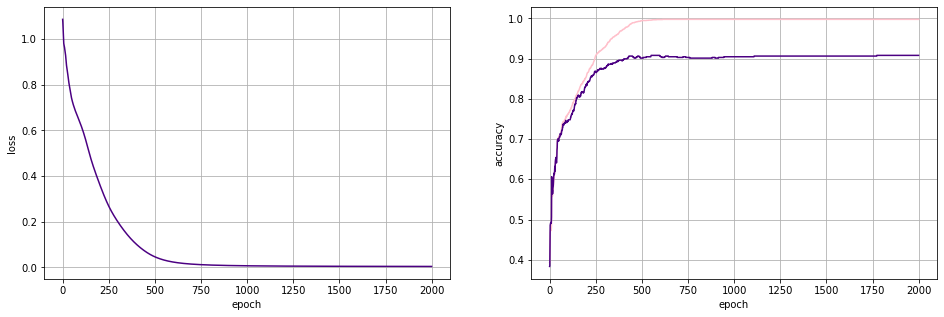

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9080068143100511
lr =  0.06 momentum =  0.9


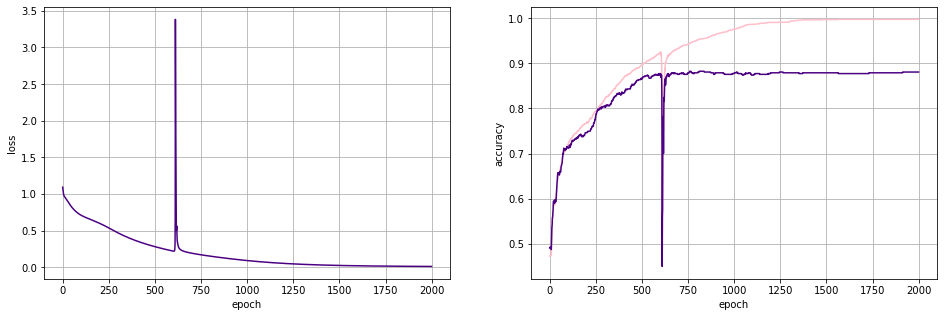

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.8807495741056218
lr =  0.07 momentum =  0.7


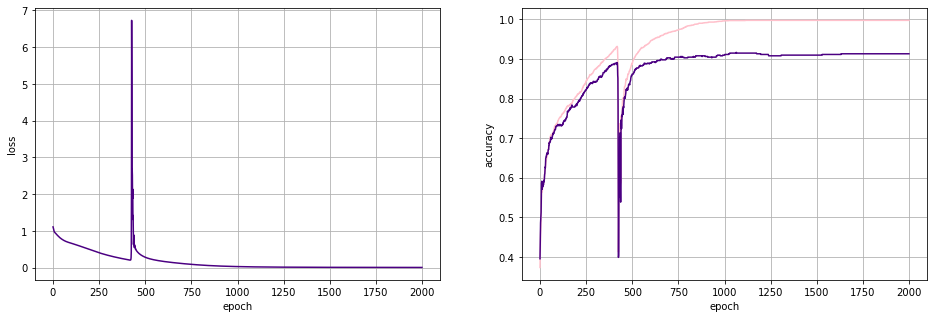

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9131175468483816
lr =  0.07 momentum =  0.8


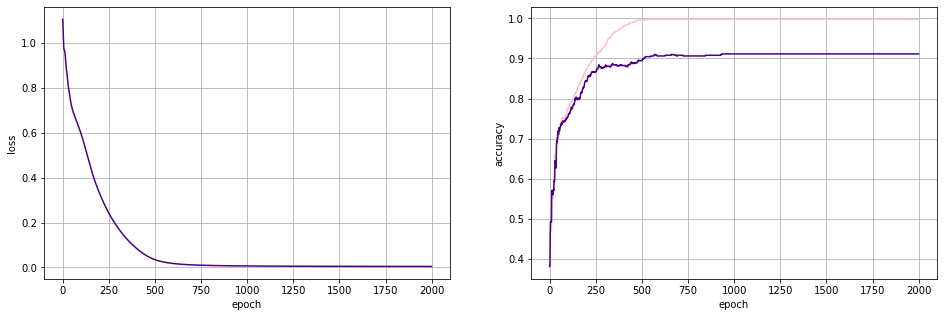

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9114139693356048
lr =  0.07 momentum =  0.9


In [9]:
epoch: int = 2000
hidden_dim1 = 50
hidden_dim2 = 50

lr_tab = [0.05, 0.06, 0.07]
momentum_tab = [0.7, 0.8, 0.9]

for lr in lr_tab:
    for momentum in momentum_tab:
        train_my_network(x_train, y_train, x_val, y_val, epoch, lr, momentum, hidden_dim1, hidden_dim2)
        print("lr = ", lr, "momentum = ", momentum )

# Compare best models:

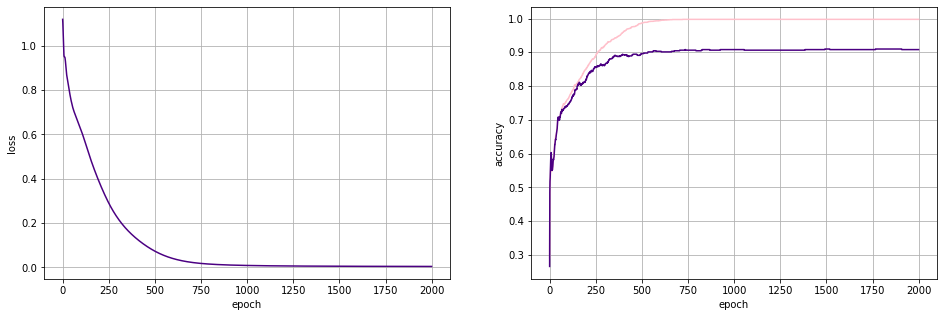

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9080068143100511


In [10]:
epoch: int = 2000
lr =  0.05
momentum = 0.9
hidden_dim1 = 30
hidden_dim2 = 30

model = train_my_network(x_train, y_train, x_val, y_val, epoch, lr, momentum, hidden_dim1, hidden_dim2)

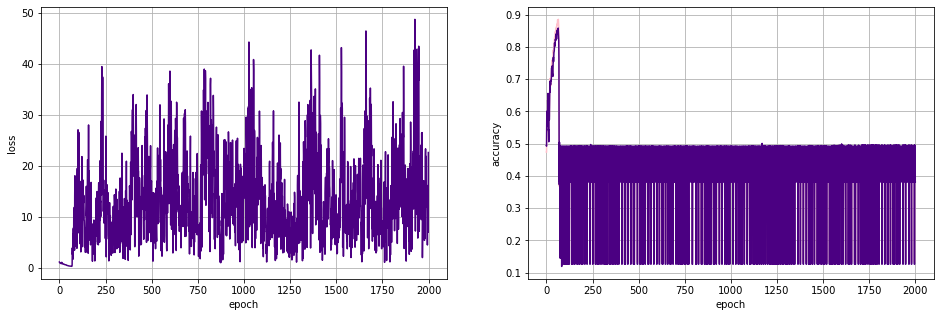

accuracy on training set: 0.394647201946472	 accuracy on testing set: 0.38160136286201024


In [11]:
epoch: int = 2000
lr =  0.5
momentum = 0.9
hidden_dim1 = 40
hidden_dim2 = 40

model = train_my_network(x_train, y_train, x_val, y_val, epoch, lr, momentum, hidden_dim1, hidden_dim2)

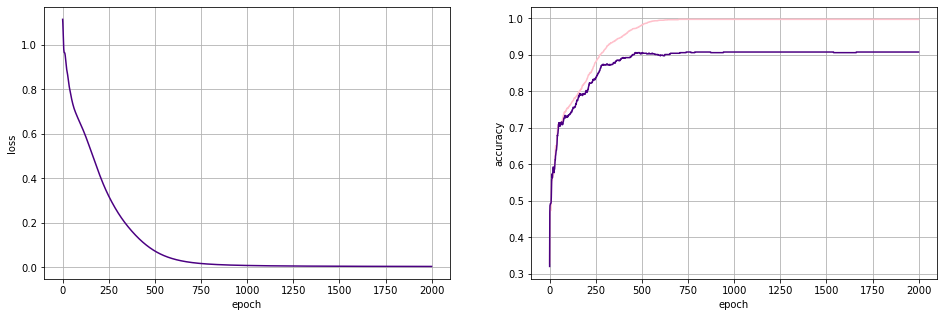

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9080068143100511


In [12]:
epoch: int = 2000
lr =  0.05
momentum = 0.9
hidden_dim1 = 50
hidden_dim2 = 50

model = train_my_network(x_train, y_train, x_val, y_val, epoch, lr, momentum, hidden_dim1, hidden_dim2)

# Best models - choosen parameters 

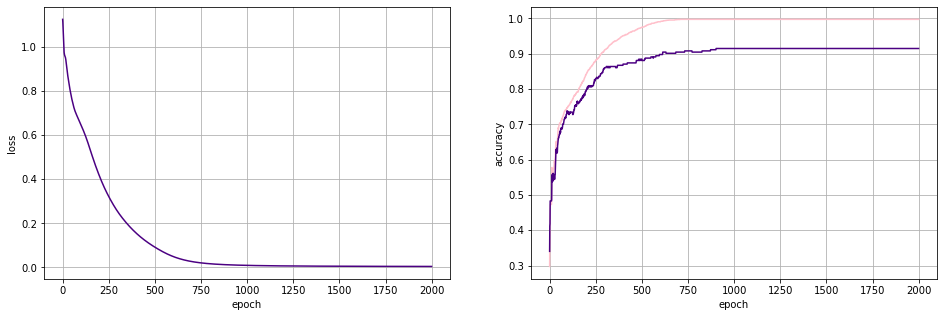

accuracy on training set: 0.9975669099756691	 accuracy on testing set: 0.9149659863945578


In [13]:
epoch: int = 2000
lr =  0.05
momentum = 0.9
hidden_dim1 = 40
hidden_dim2 = 40

model = train_my_network(x_train, y_train, x_test, y_test, epoch, lr, momentum, hidden_dim1, hidden_dim2)

## Save model

In [17]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
    
torch.save(model.state_dict(), "neural_network_model.h4")

Model's state_dict:
fc1.weight 	 torch.Size([40, 136])
fc1.bias 	 torch.Size([40])
fc2.weight 	 torch.Size([40, 40])
fc2.bias 	 torch.Size([40])
fc3.weight 	 torch.Size([3, 40])
fc3.bias 	 torch.Size([3])


## Load model

In [18]:
model = TheModelClass(input_dim, 40,40,output_dim)
model.load_state_dict(torch.load("neural_network_model.h4"))

<All keys matched successfully>

# Final evaluation:

In [19]:
with torch.no_grad():
    output: torch.Tensor = model(x_train)  
    pred_labels = torch.argmax(output, 1)
    correct = ( (pred_labels - y_train) ==0).sum()
    accuracy = ( float(correct) / len(y_train))
    print("Test accuracy: {:.2f} %".format(accuracy * 100))       
    
    output: torch.Tensor = model(x_val)  
    pred_labels = torch.argmax(output, 1)
    correct = ( (pred_labels - y_val) ==0).sum()
    accuracy = ( float(correct) / len(y_val))
    print("Test accuracy: {:.2f} %".format(accuracy * 100))       
    
    output: torch.Tensor = model(x_test)  
    pred_labels = torch.argmax(output, 1)
    correct = ( (pred_labels - y_test) ==0).sum()
    accuracy = ( float(correct) / len(y_test))
    print("Test accuracy: {:.2f} %".format(accuracy * 100))   

Test accuracy: 99.76 %
Test accuracy: 90.63 %
Test accuracy: 91.50 %
